#📌 Extracción

In [1]:
## Bibliotecas
import pandas as pd


In [2]:
data = '../data/TelecomX_Data.json'

df = pd.read_json(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [5]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [6]:
df_norm = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
],
axis=1)

#📊 Carga y análisis

In [7]:
def validar_df(df):
    print("Informacion general")
    display(df.info())
    
    print("\n Nulls por columna")
    display(df.isna().sum())
    
    print("\n Filas duplicadas")
    print(f"Duplicados totales: {df.duplicated().sum()}")
    
    print("\n Tipo de datos")
    display(df.dtypes)
    
    print("\n Resumen estadistico")
    display(df.describe())
    
    print("\n Categorias")
    for col in df.select_dtypes(include='object'):
        print(f"\n- {col}")
        display(df[col].value_counts())


validar_df(df_norm)

Informacion general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267

None


 Nulls por columna


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


 Filas duplicadas
Duplicados totales: 0

 Tipo de datos


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


 Resumen estadistico


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000



 Categorias

- customerID


customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9938-ZREHM    1
9940-HPQPG    1
             ..
0013-SMEOE    1
0014-BMAQU    1
0015-UOCOJ    1
0016-QLJIS    1
0017-DINOC    1
Name: count, Length: 7267, dtype: int64


- Churn


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


- gender


gender
Male      3675
Female    3592
Name: count, dtype: int64


- Partner


Partner
No     3749
Yes    3518
Name: count, dtype: int64


- Dependents


Dependents
No     5086
Yes    2181
Name: count, dtype: int64


- PhoneService


PhoneService
Yes    6560
No      707
Name: count, dtype: int64


- MultipleLines


MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


- InternetService


InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


- OnlineSecurity


OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64


- OnlineBackup


OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64


- DeviceProtection


DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64


- TechSupport


TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64


- StreamingTV


StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64


- StreamingMovies


StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64


- Contract


Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


- PaperlessBilling


PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64


- PaymentMethod


PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


- Charges.Total


Charges.Total
20.2       11
           11
19.75       9
19.9        9
19.55       9
           ..
4018.05     1
633.45      1
742.9       1
4627.65     1
7220.35     1
Name: count, Length: 6531, dtype: int64

In [8]:
df_norm['Charges.Total'] = pd.to_numeric(df_norm['Charges.Total'], errors='coerce')

In [9]:
df_norm['Charges.Total'].isna().sum()

np.int64(11)

In [10]:
df_norm['Charges.Total'] = df_norm['Charges.Total'].fillna(df_norm['Charges.Monthly'] * df_norm['tenure'])

In [11]:
df_norm['Churn'] = df_norm['Churn'].replace('', pd.NA)

In [12]:
df_norm['Churn'].isna().sum()
df_norm = df_norm.dropna(subset='Churn')

FINALIZADA LA LIMPIEZA DE DATOS

In [13]:
df_norm['Cuentas_diarias'] = (df_norm['Charges.Monthly'] / 30).round(2)

In [14]:
df_norm = df_norm.rename(columns={
    'Churn' : 'Active',
    'tenure' : 'Antique'
})

In [15]:
binarias = ['Active', 'Partner', 'Dependents', 'PhoneService']

for col in binarias:
    df_norm[col] = df_norm[col].map({'Yes' : 1, 'No' : 0})

In [16]:
## ESTANDARIZACION TERMINADA
df_norm

,customerID,Active,gender,SeniorCitizen,Partner,Dependents,Antique,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [17]:
df_norm['Active'] = df_norm['Active'].map({1: 0, 0: 1})

#🔧 Transformación

Analisis descriptivo

In [18]:
df_norm[['Active', 'Antique']].describe()

,Active,Antique
count,7043.000000,7043.000000
mean,0.734630,32.371149
std,0.441561,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,1.000000,29.000000
75%,1.000000,55.000000
max,1.000000,72.000000


Podemos ver que solo el 26,5% de los clientes no estan activos y la antiguedad promedio es de 32 meses.
La antiguedad de los clientes varia bastante, el 25% cuenta con menos de 9 meses de servicio, mientras que el 25% superior cuenta con promedio de 55 meses de antiguedad.

In [19]:
activos = (df_norm['Active'].value_counts(normalize=True) * 100).round(2)

contratos = (df_norm['Contract'].value_counts(normalize=True) * 100).round(2)

metodo_pago = (df_norm['PaymentMethod'].value_counts(normalize= True) * 100).round(2)

print(f'\n {activos}')

print(f'\n {contratos}')

print(f'\n {metodo_pago}')


 Active
1    73.46
0    26.54
Name: proportion, dtype: float64

 Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: proportion, dtype: float64

 PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: proportion, dtype: float64


Informacion estadistica de algunas de las columnas que tenemos, como actividad para confirmar el porcentaje dado anteriormente, los tipos de contratos y metodos de pagos

In [20]:
df_norm.groupby('Active')['Antique'].mean()


Active
0    17.979133
1    37.569965
Name: Antique, dtype: float64

Antiguedad promedio de los usuarios activos y no activos, vemos que los usuarios activos son mucho mas nuevos que los que cortaron el servicio

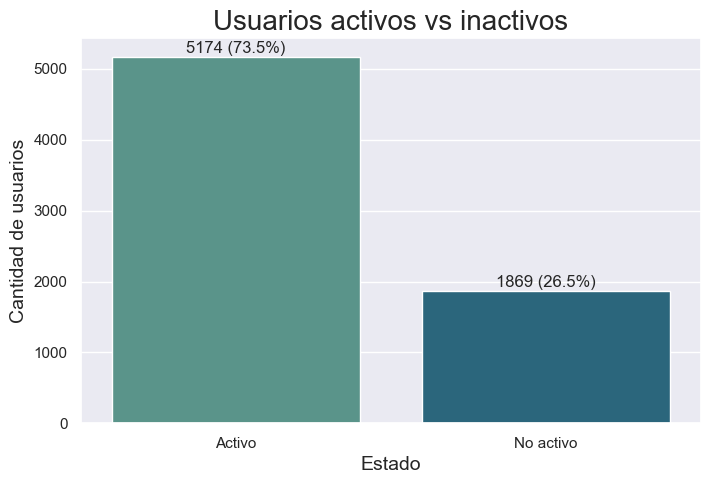

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


usuarios_activos = df_norm['Active'].value_counts().reset_index()
usuarios_activos.columns = ['Estado', 'Cantidad']


usuarios_activos['Estado'] = usuarios_activos['Estado'].map({
    0: 'No activo',
    1: 'Activo'
})

sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=usuarios_activos,
    x='Estado',
    y='Cantidad',
    palette='crest',
    ax=ax,
    hue='Estado',
    legend=False
)

ax.set_title('Usuarios activos vs inactivos', fontsize=20)
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Cantidad de usuarios', fontsize=14)


total = usuarios_activos['Cantidad'].sum()

for i, row in usuarios_activos.iterrows():
    ax.text(
        i,
        row['Cantidad'] + 50,
        f"{row['Cantidad']} ({row['Cantidad']/total:.1%})",
        ha='center',
        fontsize=12
    )

plt.show()

Como vimos antes en codigo, casi un 30% de los usuarios ya no se encuentran activos en el servicio.A continuacion veremos si hay aalguna coincidencia entre ese porcentaje y las demas categorias.


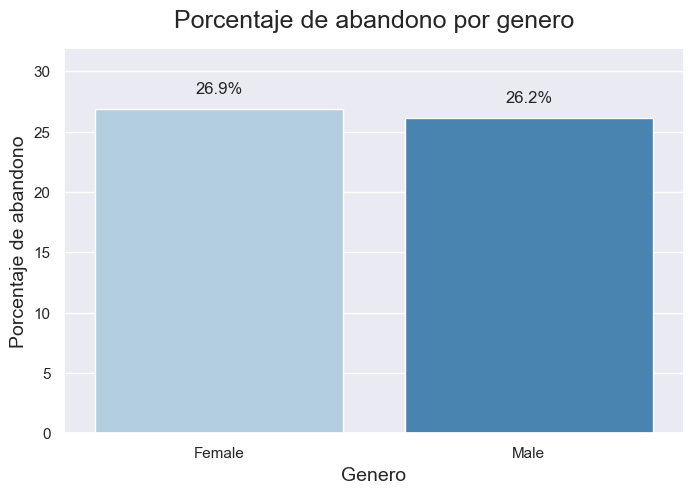

In [22]:
active_gender  = df_norm.groupby('gender')['Active'].mean().reset_index() 
active_gender.columns = ['Genero', 'Porcentaje de abandono']
active_gender['Porcentaje de abandono'] = (active_gender['Porcentaje de abandono']* 100).round(2)
active_gender['Porcentaje de abandono'] = 100 - active_gender['Porcentaje de abandono']


sns.set_theme()

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(
    data=active_gender,
    x='Genero',
    y='Porcentaje de abandono',
    palette='Blues',
    legend=False,
    hue='Genero',
    ax=ax
)

ax.set_ylim(0, active_gender['Porcentaje de abandono'].max() + 5)
ax.set_title(
    'Porcentaje de abandono por genero',
    fontsize=18,
    pad=15
)
ax.set_xlabel('Genero', fontsize=14)
ax.set_ylabel('Porcentaje de abandono', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,                    
        f'{height:.1f}%',               
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.show()

Luego de analizar el grafico podemos ver que el genero no es una razon para dar de baja el servicio ya que ambos porcentajes de abandono rondan por el mismo valor.Vamos a analizar las demas columnas de datos para ver si encontramos alguna razon mas clara.
En vez de centrarme en las columnas descriptivas de los clientes como edades, solteria, etc me voy a basar en los contratos ya que eso tendria mas logica

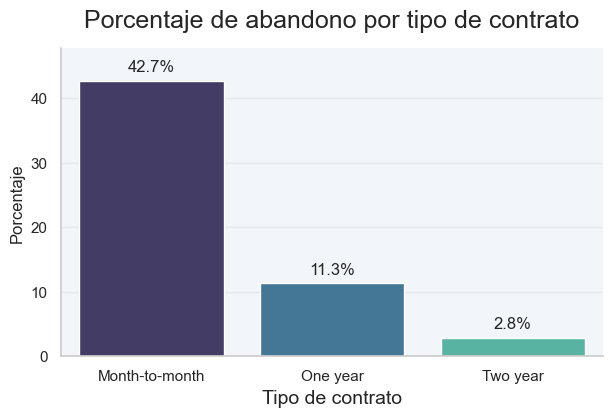

In [23]:
active_contract = df_norm.groupby('Contract')['Active'].mean().reset_index()
active_contract.columns = ['Contrato', 'Porcentaje de abandono']
active_contract['Porcentaje de abandono'] = (active_contract['Porcentaje de abandono'] * 100).round(2)
active_contract['Porcentaje de abandono'] = 100 - active_contract['Porcentaje de abandono']


sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(7,4))
ax.set_facecolor('#F2F6FA')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.barplot(data=active_contract, x='Contrato', y='Porcentaje de abandono', palette='mako', hue='Contrato', legend=False)
ax.set_ylim(0, active_contract['Porcentaje de abandono'].max() + 5)
ax.set_title(
    'Porcentaje de abandono por tipo de contrato',
    fontsize=18,
    pad=15
)
ax.set_xlabel('Tipo de contrato', fontsize=14)
ax.set_ylabel('Porcentaje')


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,                    
        f'{height:.1f}%',               
        ha='center',
        va='bottom',
        fontsize=12
    )

Se puede observar que los clientes con contratos mensuales tienen el mayor porcentaje de baja con un 42.7% de abandono.Mientras, que los demas planes
cuentan con tasas significativamente menores, asi que podemos afirmar que el tipo de contrato es un factor clave en la continuidad del servicio.

In [24]:
columnas = list(df_norm.columns)

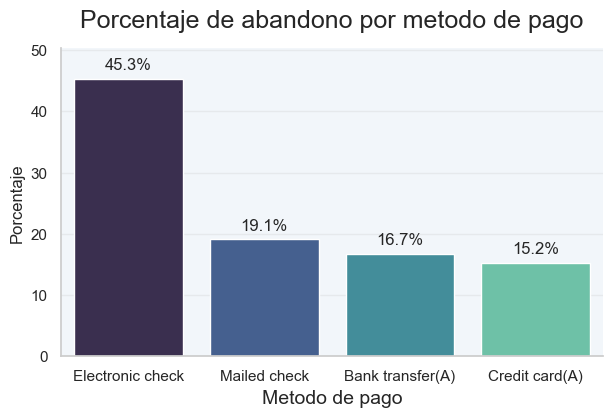

In [26]:
active_payment = df_norm.groupby('PaymentMethod')['Active'].mean().reset_index().sort_values(by='Active', ascending=True)
active_payment.columns = ['Metodo de pago', 'Tasa de abandono']
active_payment['Tasa de abandono'] = (active_payment['Tasa de abandono'] * 100).round(2)
active_payment['Tasa de abandono'] = 100 - active_payment['Tasa de abandono']

active_payment['Metodo de pago'] = active_payment['Metodo de pago'].replace({
    'Bank transfer (automatic)' : 'Bank transfer(A)',
    'Credit card (automatic)' : 'Credit card(A)'
})

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(7,4))
ax.set_facecolor('#F2F6FA')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.barplot(data=active_payment, x='Metodo de pago', y='Tasa de abandono', palette='mako', hue='Metodo de pago', legend=False)

ax.set_ylim(0, active_payment['Tasa de abandono'].max() + 5)
ax.set_title(
    'Porcentaje de abandono por metodo de pago',
    fontsize=18,
    pad=15
)
ax.set_xlabel('Metodo de pago', fontsize=14)
ax.set_ylabel('Porcentaje')


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,                    
        f'{height:.1f}%',               
        ha='center',
        va='bottom',
        fontsize=12
    )


Los clientes con métodos de pago automáticos presentan una menor tasa de abandono, lo que sugiere que se podrian buscar incentivos en cheques electronicos para intentar mantener a esos clientes que se dan de baja

In [27]:
active_conditions = df_norm.groupby(['Contract', 'PaymentMethod'])['Active'].mean().reset_index()
active_conditions.columns = ['Contrato', 'Metodo de pago', 'Porcentaje de abandono']
active_conditions['Porcentaje de abandono'] = (active_conditions['Porcentaje de abandono'] * 100).round(2)
active_conditions['Porcentaje de abandono'] = 100 - active_conditions['Porcentaje de abandono']
active_conditions


,Contrato,Metodo de pago,Porcentaje de abandono
0,Month-to-month,Bank transfer (automatic),34.13
1,Month-to-month,Credit card (automatic),32.78
2,Month-to-month,Electronic check,53.73
3,Month-to-month,Mailed check,31.58
4,One year,Bank transfer (automatic),9.72
5,One year,Credit card (automatic),10.30
6,One year,Electronic check,18.44
7,One year,Mailed check,6.82
8,Two year,Bank transfer (automatic),3.37
9,Two year,Credit card (automatic),2.24


Se evaluó la relación conjunta entre tipo de contrato y método de pago.
Si bien el abandono es mayor en contratos mensuales y en determinados métodos de pago, la tasa de abandono se mantiene elevada para contratos mensuales independientemente del método, lo que indica que no existe una interacción significativa entre ambas variables.

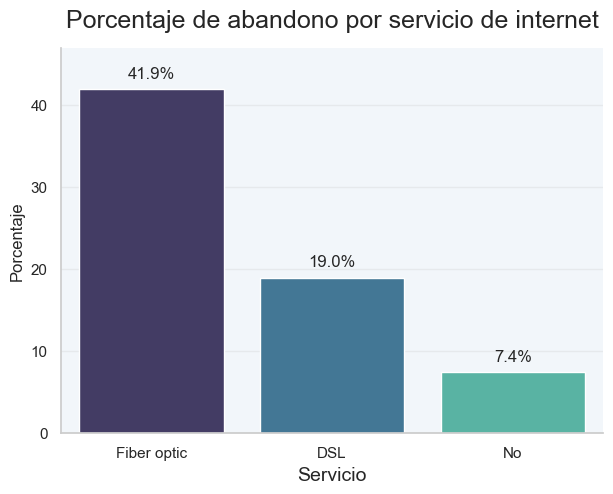

In [28]:
active_internet = df_norm.groupby('InternetService')['Active'].mean().reset_index().sort_values(by='Active', ascending=True)
active_internet.columns = ['Servicio', 'Tasa de abandono']
active_internet['Tasa de abandono'] = (active_internet['Tasa de abandono'] * 100).round(2)
active_internet['Tasa de abandono'] = 100 - active_internet['Tasa de abandono']

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(7,5))
ax.set_facecolor('#F2F6FA')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.barplot(data=active_internet, x='Servicio', y='Tasa de abandono', palette='mako', hue='Servicio', legend=False)

ax.set_ylim(0, active_internet['Tasa de abandono'].max() + 5)
ax.set_title(
    'Porcentaje de abandono por servicio de internet',
    fontsize=18,
    pad=15
)
ax.set_xlabel('Servicio', fontsize=14)
ax.set_ylabel('Porcentaje')


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,                    
        f'{height:.1f}%',               
        ha='center',
        va='bottom',
        fontsize=12
    )

Los clientes con fibra optica presentan la mayor tasa de abandono de entre los planes de servicio.Esto podria significar una expectativa insatisfecha del servicio, problemas tecnicos
o otra razon que deberia investigarse.

Vamos a analizar valores en ves de grupos para ver si encontramos una razon mas clara para el abandono de clientes

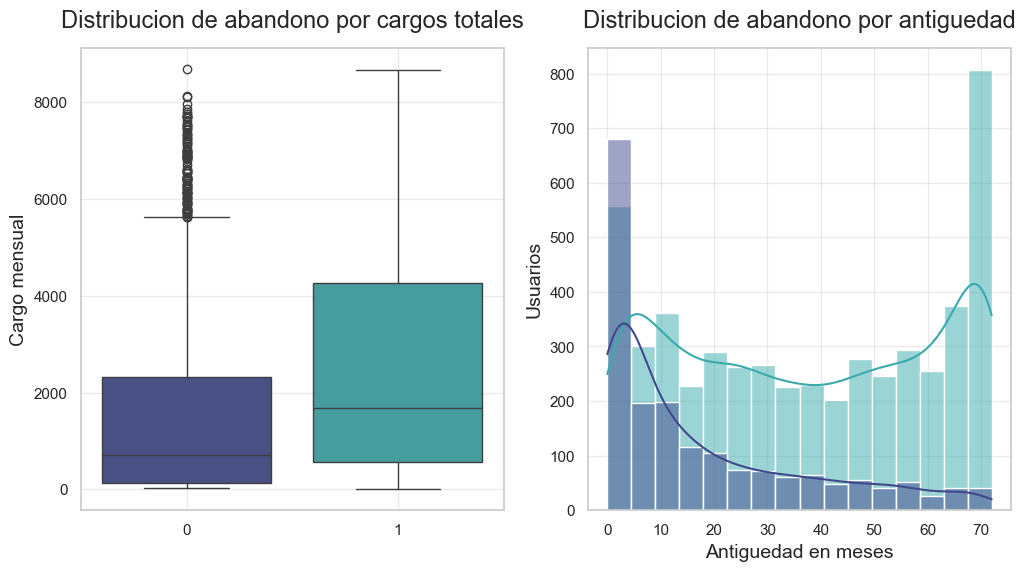

In [30]:
sns.set_theme(style='whitegrid')

fig, axs = plt.subplots(1,2, figsize=(12, 6))

sns.boxplot(data=df_norm, x='Active', y='Charges.Total', ax=axs[0], palette='mako', hue='Active', legend=False)
axs[0].set_title('Distribucion de abandono por cargos totales', fontsize=17, pad=15)
axs[0].grid(True, alpha=0.4)
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Cargo mensual', fontsize=14)



sns.histplot(data=df_norm, x='Antique', hue='Active', kde=True, legend=False, palette='mako', ax=axs[1])
axs[1].set_title('Distribucion de abandono por antiguedad', fontsize=17, pad=15)
axs[1].set_xlabel('Antiguedad en meses', fontsize=14)
axs[1].set_ylabel('Usuarios', fontsize=14)
axs[1].grid(True, alpha=0.4)
plt.show()

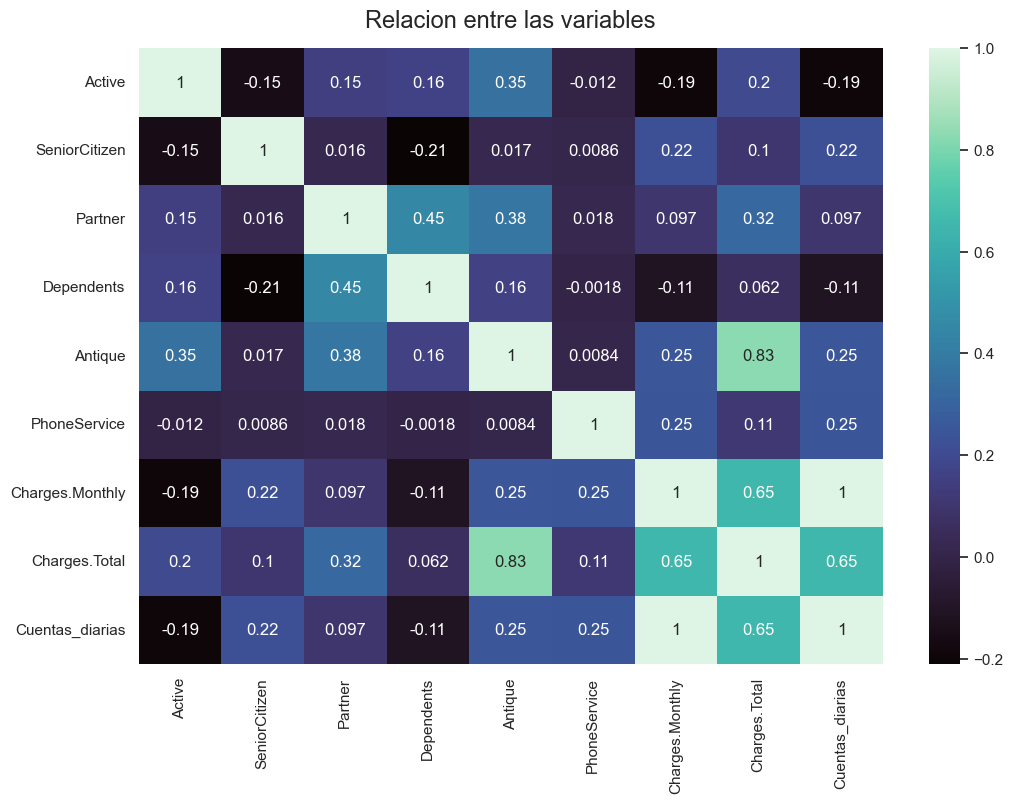

Active             1.000000
Antique            0.352229
Charges.Total      0.198324
Dependents         0.164221
Partner            0.150448
PhoneService      -0.011942
SeniorCitizen     -0.150889
Charges.Monthly   -0.193356
Cuentas_diarias   -0.193412
Name: Active, dtype: float64


In [52]:
corr_df = df_norm.select_dtypes(include=['float64', 'int64'])
corr_matrix = corr_df.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Relacion entre las variables', fontsize=17, pad=15)
plt.show()

print(corr_matrix['Active'].sort_values(ascending=False))

#📄Informe final

🔹Objetivo : Analizar el fenómeno de baja de clientes en Telecom X. La empresa enfrenta una tasa significativa de cancelaciones, por lo que resulta clave identificar los factores asociados a la pérdida de clientes con el fin de diseñar estrategias de retención más efectivas.


🔹Análisis Exploratorio de Datos

📊 Distribución de costos
La mayoría de los clientes presenta cargos mensuales bajos, aunque existe una alta dispersión en el gasto total.
Los clientes que permanecen en la compañía tienden a acumular un mayor gasto total, explicado principalmente por una mayor antigüedad.

📉 Deserción general
La tasa global de baja es del 26.54%, un valor significativo que requiere intervención estratégica.

👤 Género
La tasa de baja es similar entre hombres y mujeres, lo que sugiere que el género no es un factor determinante.

📑 Tipo de contrato
Month-to-month: presenta la mayor tasa de baja (~42%).
One year: baja intermedia (~11%).
Two year: menor baja (~3%).
Esto indica que los contratos más largos se asocian con mayor permanencia.

⏳ Antigüedad del cliente
La baja se concentra en los primeros meses del contrato.
Los clientes que abandonan tienen, en promedio, menor antigüedad.

💳 Método de pago
El cheque electrónico presenta la mayor tasa de baja.
Los métodos de pago automáticos muestran mayor retención.

📦 Perfil de servicios
Los clientes que permanecen suelen tener mayor cantidad de servicios contratados.
Un bajo nivel de uso se asocia con mayor probabilidad de abandono.


🔹Posibles soluciones : 

✅ Reducir churn temprano
Implementar seguimiento intensivo durante los primeros 6 meses.

✅ Estrategia de contratos
Incentivar contratos de mayor duración mediante beneficios reales y claros.

✅ Fidelización por servicios
Promover paquetes personalizados que aumenten el uso y la vinculación.

✅ Optimización de pagos
Incentivar pagos automáticos con descuentos o beneficios adicionales.